<a href="https://colab.research.google.com/github/gayathri-g-murali/book-sales-analysis-eda/blob/main/FINLEY_AI_CHATBOT_MISTRAL_GRADIO_IMPLEMENTATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FINLEY AI - CHATBOT - MISTRAL- GRADIO - IMPLEMENTATION**

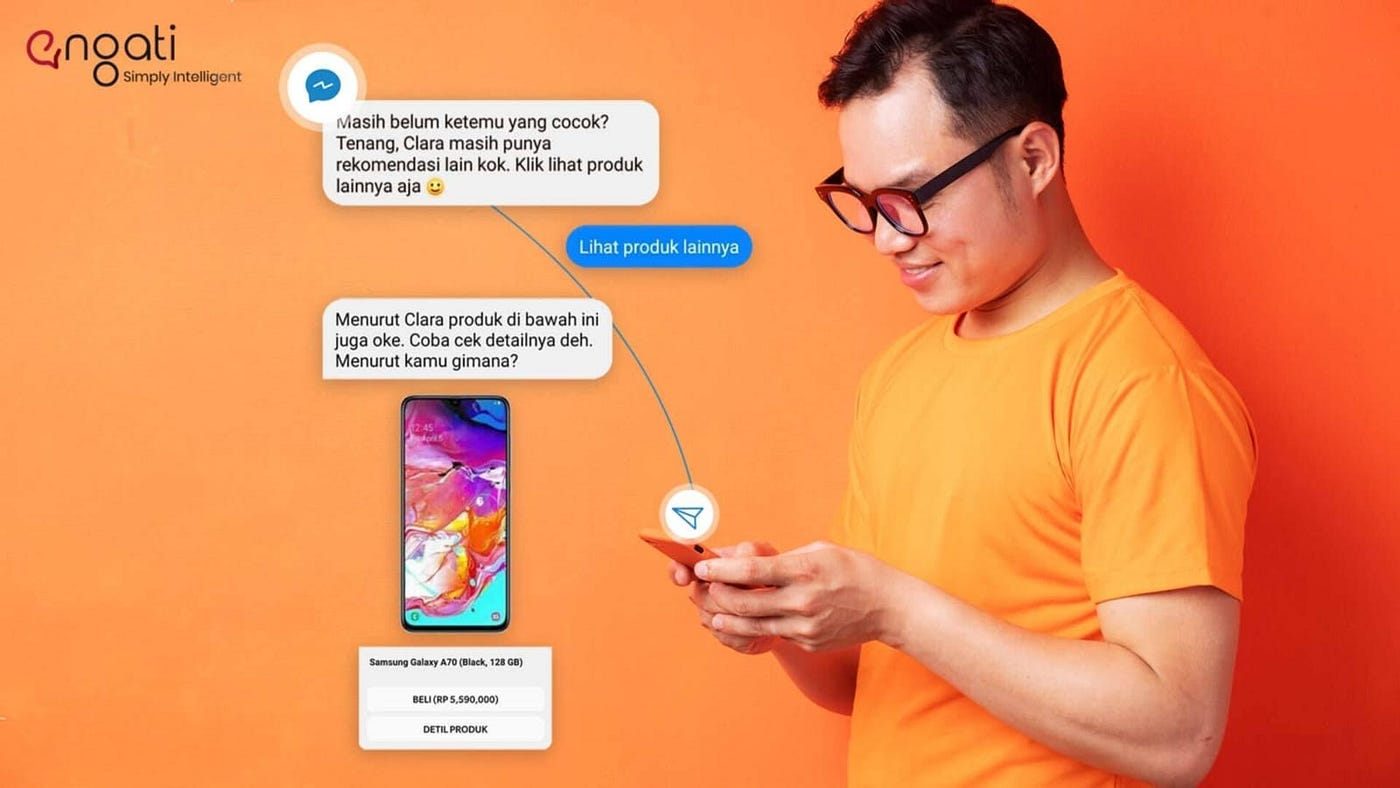

In [ ]:
# Importing libraries
import gradio as gr
import requests
import json

In [ ]:
# Declaring model
model_name = "mistralai/mistral-small-3.2-24b-instruct:free"
api_key = ""
API_URL = "https://openrouter.ai/api/v1/chat/completions" # To access all the different models in the specified site.

In [ ]:
# Function to select model and api_key
def apply_settings(user_api_key,choosen_model):
  global api_key, model_name
  api_key = user_api_key
  model_name = choosen_model or model_name

In [ ]:
# Send Message / Get Reply from the chatbot
def stream_chat_reply(user_message, conversation_history=[]):
    if not api_key:
        return "Please paste your OPEN ROUTER API KEY!"
    messages = [
        {"role": "system", "content": "You are a helpful assistant."}
    ]
    for past_user_message, past_bot_message in conversation_history:
        if past_user_message:
            messages.append({"role": "user", "content": past_user_message})
        if past_bot_message:
            messages.append({"role": "assistant", "content": past_bot_message})
    messages.append({"role": "user", "content": user_message})  # Add current message
    headers = {
        "Authorization": f"Bearer {api_key}",
        "Content-Type": "application/json",
        "Accept": "text/event-stream"
    }
    body = {
        "model": model_name,
        "messages": messages,
        "stream": True
    }
    with requests.post(API_URL, headers=headers, json=body, stream=True, timeout=300) as response:
        partial_text = ""
        for raw in response.iter_lines(decode_unicode=True):
            if not raw or not raw.startswith("data:"):
                continue
            data = raw[5:].strip()
            if data == "[DONE]":
                break
            if not data.startswith("{"):
                continue
            chunk = json.loads(data)
            delta = chunk.get("choices", [{}])[0].get("delta", {})
            token = delta.get("content")
            if token:
                partial_text += token
                yield partial_text

In [ ]:
import gradio as gr

with gr.Blocks() as demo:
    gr.Markdown("# 🪼 Finley AI")

    with gr.Row():
        api_key_box = gr.Textbox(
            label="🔑 API Key",
            placeholder="Paste OPENROUTER API KEY here.",
            type="password"
        )
        model_box = gr.Dropdown(
            label="🤖 Model",
            choices=["mistralai/mistral-small-3.2-24b-instruct:free", "mistralai/devstral-small-2505:free"],
            value="mistralai/mistral-small-3.2-24b-instruct:free",
            interactive=True
        )
    apply_button = gr.Button("Apply")
    status = gr.Markdown("Paste your API Key, then click apply")

    apply_button.click(apply_settings, [api_key_box, model_box], status)

    gr.Markdown("Ask me Anything!")
    gr.ChatInterface(fn=stream_chat_reply).queue()

demo.launch(share=True)

/usr/local/lib/python3.12/dist-packages/gradio/chat_interface.py:345: UserWarning: The 'tuples' format for chatbot messages is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style 'role' and 'content' keys.
  self.chatbot = Chatbot(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://39b00b1772f88d9b89.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
